
<h1>Global Food Waste Analysis</h1> 

## Introduction

The purpose of this notebook is to perform and document an exploratory data analysis (EDA) to the Food Loss and Waste Database from the Food and Agriculture Organization of the United Nations (FAO) in order to gather some insights and predict future outcomes about this problem. 

A cleaned dataset with the classification of commodity baskets according to the UN Sustainable Development Target 12.3 will be submitted to Kaggle as an attempt to provide some information gain for further studies. 

Also a visualization dashboard will be generated in Tableau with the most relevant finding of this study. 


 <i>If just one fourth of lost or wasted food were saved, it could end global hunger.</i> 
         

Have you ever heard that 


According to the Food and Agriculture Organization of the United Nations (FAO), the world loses a third of the food it produces. It is claim 


Wasted food requires energy, land, water and labor to produce, store, harvest, transport, package and sell. When we toss out food, we’re throwing away precious resources that could have been used to feed hungry people. And all that rotting food produces three billion tons of greenhouse gases like methane, directly contributing to climate change.

Have you ever heard one third of the Food produced is wasted 


How many times have you heard one third of the food 

Food loss 

Data collection efforts are urgently needed in countries to target interventions at critical stages of the value chain and reduce food losses and waste.

- 5 commodities wuth largest waste
- 5 countries with largest percentage waste 
- 5 correlation between features 
- 5 countries better reducing waste 

## Data Collection

In [2]:
#Import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

/home/proctor/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


About the Food Loss and Waste database: it is the largest online collection of data on both food loss and food waste and causes reported in scientific journals, academic publications, grey literature, countries among others. The database contains data and information from openly accessible databases, reports and studies measuring food loss and waste across food products, stages of the value chain, and geographical areas.

It can be downloaded at https://www.fao.org/platform-food-loss-waste/flw-data/en/

In [48]:
#Import Dataset
df = pd.read_csv('Data6522.csv')
df.head()

/tmp/ipykernel_15393/2326715510.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data6522.csv')


,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN


## Data Preparation

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32947 entries, 0 to 32946
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  32947 non-null  int64  
 1   country                   32947 non-null  object 
 2   region                    974 non-null    object 
 3   cpc_code                  32947 non-null  object 
 4   commodity                 32947 non-null  object 
 5   year                      32947 non-null  int64  
 6   loss_percentage           32947 non-null  float64
 7   loss_percentage_original  32947 non-null  object 
 8   loss_quantity             7444 non-null   object 
 9   activity                  21036 non-null  object 
 10  food_supply_stage         32875 non-null  object 
 11  treatment                 971 non-null    object 
 12  cause_of_loss             1177 non-null   object 
 13  sample_size               1307 non-null   object 
 14  method

In [50]:
df.nunique()

m49_code                     157
country                      158
region                       180
cpc_code                     195
commodity                    202
year                          55
loss_percentage             2232
loss_percentage_original    3769
loss_quantity               4526
activity                     120
food_supply_stage             19
treatment                    305
cause_of_loss                483
sample_size                  230
method_data_collection        11
reference                    444
url                          125
notes                        162
dtype: int64

In [51]:
df.columns

Index(['m49_code', 'country', 'region', 'cpc_code', 'commodity', 'year',
       'loss_percentage', 'loss_percentage_original', 'loss_quantity',
       'activity', 'food_supply_stage', 'treatment', 'cause_of_loss',
       'sample_size', 'method_data_collection', 'reference', 'url', 'notes'],
      dtype='object')

As shown, out of 18 columns only some hold the valuable and complete information we need. So for the purpose of this analysis we will narrow our dataset to the Country, Commodity, Loss Percentage, Activity, Food Supply Stage and Method Data Collection levels.


In [52]:
#Drop columns not relevant 
df.drop(['region','treatment','loss_percentage_original','loss_quantity','region','url','cause_of_loss','reference','sample_size','notes'],axis=1,inplace=True)


The column 'activity' has 21036 non null values. Let's explore if they correspond to a specific time frame that we can filter. First, we must convert the 'nan' values to a manageable string and then compare the count of available data per year. 

In [53]:
df = df.replace(float('nan'), "Unknown")

<AxesSubplot:xlabel='year,year'>

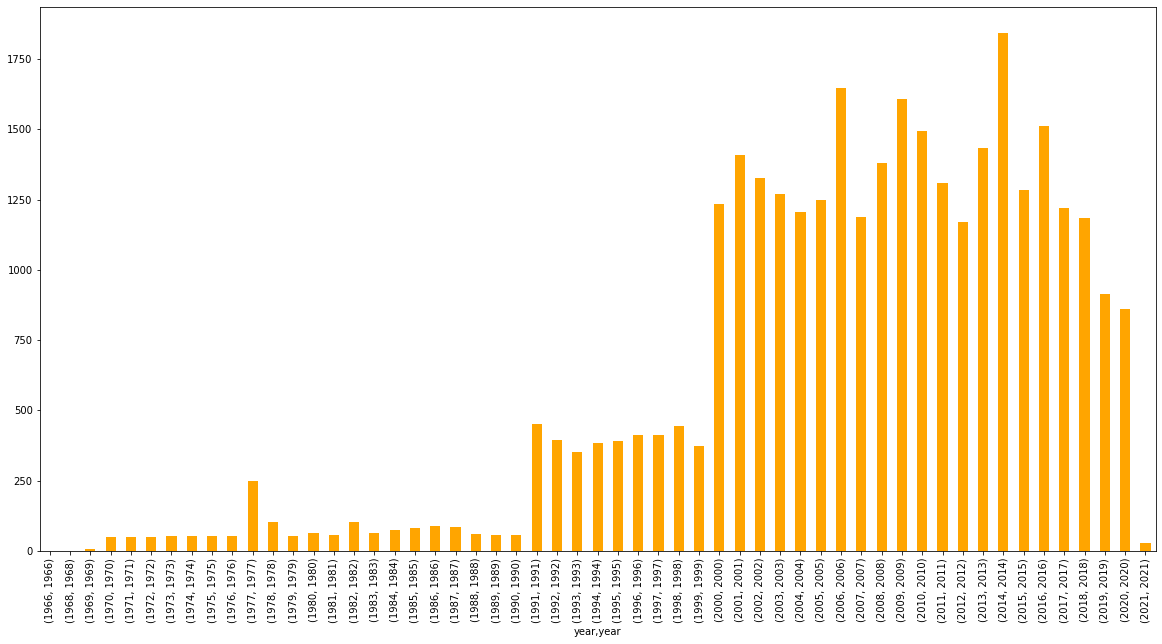

In [54]:
plt.figure(figsize=(20,10))
df_general = df.groupby('year')['year'].value_counts().plot(kind='bar', color='orange')
df_general

In [55]:
only_unknowns = df.loc[df['activity']=='Unknown']


<AxesSubplot:xlabel='year,activity'>

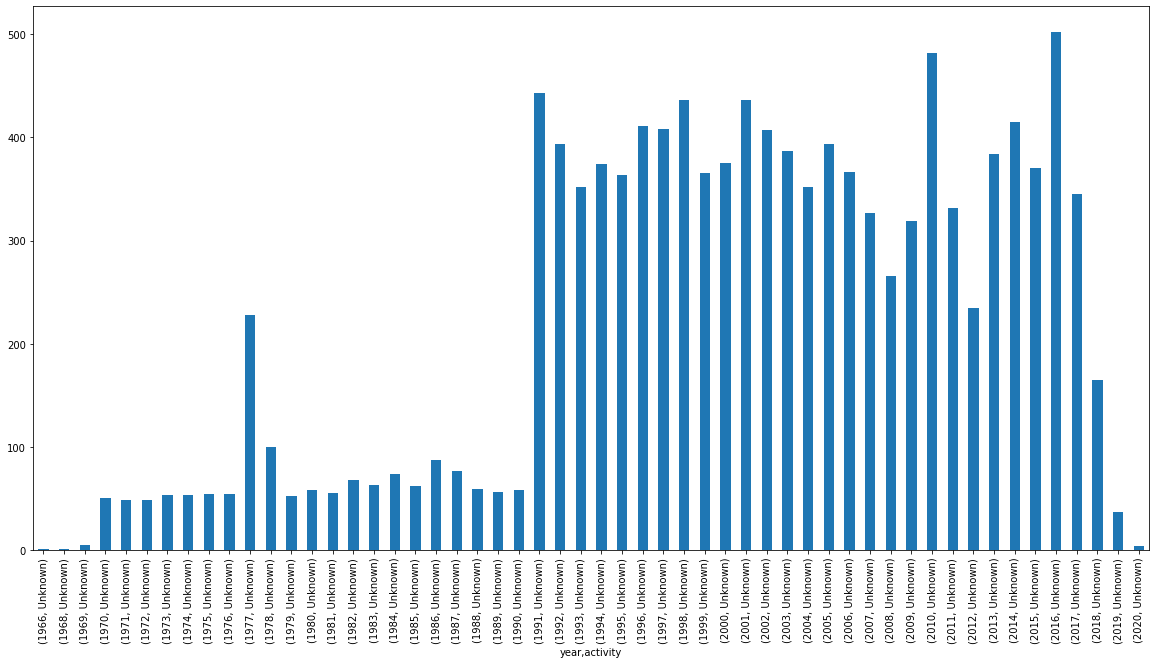

In [56]:
plt.figure(figsize=(20,10))
df_unknown = only_unknowns.groupby('year')['activity'].value_counts().plot(kind='bar')
df_unknown

From the graphs we can observe the 'Unknown' values are actually correlated with the amount of data for each year. So now we can decide to drop this column and use the 'Food Stage' column instead to get a sense of where the loss is ocurring in the food cycle.  

In [57]:
df.drop(['activity'],axis=1,inplace=True)

## Exploratory Data Analysis


Now that our dataset is cleaned we can start exploring it. Let's start by exploring the commodities data. 


In [58]:
df.head()

,m49_code,country,cpc_code,commodity,year,loss_percentage,food_supply_stage,method_data_collection
0,104,Myanmar,0142,"Groundnuts, excluding shelled",2009,5.22,Whole supply chain,FAO's annual Agriculture Production Questionna...
1,104,Myanmar,0142,"Groundnuts, excluding shelled",2008,5.43,Whole supply chain,FAO's annual Agriculture Production Questionna...
2,104,Myanmar,0142,"Groundnuts, excluding shelled",2007,5.61,Whole supply chain,FAO's annual Agriculture Production Questionna...
3,104,Myanmar,0142,"Groundnuts, excluding shelled",2006,5.40,Whole supply chain,FAO's annual Agriculture Production Questionna...
4,104,Myanmar,0142,"Groundnuts, excluding shelled",2005,5.00,Whole supply chain,FAO's annual Agriculture Production Questionna...


'Loss Percentage' means the  Food Loss as a percentage of domestic production.


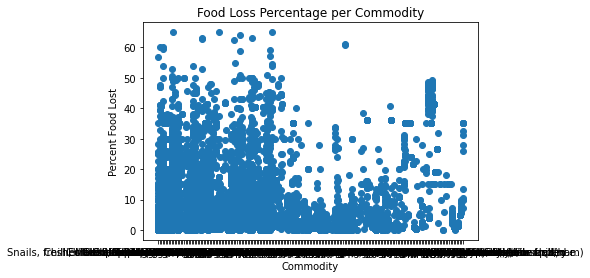

In [59]:
x = df['commodity']
y = df['loss_percentage']
plt.plot(x,y,'o')
plt.title('Food Loss Percentage per Commodity')
plt.xlabel('Commodity')
plt.ylabel('Percent Food Lost')
plt.show()

As shown, there are far too many crops to compare together. To work around this issue we will sort the crops into categories or commodity baskets.

### Food Loss by Commody Baskets

The Central Product Classification (CPC) consists of a coherent and consistent classification structure for products (goods and services) based on a set of internationally agreed concepts, definitions, principles and classification rules. It was developed by the United Nations and provides a comprehensive framework to analyze data in the same format. 

The CPC source can be found [here](view-source:https://unstats.un.org/unsd/classifications/Econ/Download/In%20Text/CPC_Ver_2_1_english_structure.txt)

In [60]:
#Convert all CPC values to string
df['cpc_code'] = df['cpc_code'].astype(str)

In [61]:
#Add leading zero to match source
df['cpc_code'] = df['cpc_code'].str.zfill(4)


In [62]:
df.tail()

,m49_code,country,cpc_code,commodity,year,loss_percentage,food_supply_stage,method_data_collection
32942,894,Zambia,0112,Maize (corn),1977,4.05,Storage,Case Study
32943,894,Zambia,0112,Maize (corn),1977,3.00,Storage,Case Study
32944,894,Zambia,0112,Maize (corn),1977,3.50,Storage,Case Study
32945,894,Zambia,0112,Maize (corn),1977,13.00,Storage,Case Study
32946,894,Zambia,0112,Maize (corn),1977,9.00,Storage,Case Study


In [63]:
df['commodity_basket'] = ['Other crops (stimulants, spices, sugar, etc.)' if cpc.startswith(('0137', '016','018', '029','235','019','232')) 
                    else 'Cereals & Pulses' if cpc.startswith(('011', '231','017','1706','39120','237'))
                    else 'Fruits And Vegetables' if cpc.startswith(('012', '013','2141','2143','213','242','F0262'))
                    else 'Animals products; Fish and fish products' if cpc.startswith(('211','022','023','215','222','021'))
                    else 'Roots, Tubers & Oil-Bearing Crops' if cpc.startswith(('014','015','2142','216'))
                    else 'Unknown' for cpc in df['cpc_code']] 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32947 entries, 0 to 32946
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   m49_code                32947 non-null  int64  
 1   country                 32947 non-null  object 
 2   cpc_code                32947 non-null  object 
 3   commodity               32947 non-null  object 
 4   year                    32947 non-null  int64  
 5   loss_percentage         32947 non-null  float64
 6   food_supply_stage       32947 non-null  object 
 7   method_data_collection  32947 non-null  object 
 8   commodity_basket        32947 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.3+ MB


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Roots, Tubers & Oil-Bearing Crops'),
  Text(1, 0, 'Cereals & Pulses'),
  Text(2, 0, 'Animals products; Fish and fish products'),
  Text(3, 0, 'Fruits And Vegetables'),
  Text(4, 0, 'Other crops (stimulants, spices, sugar, etc.)')])

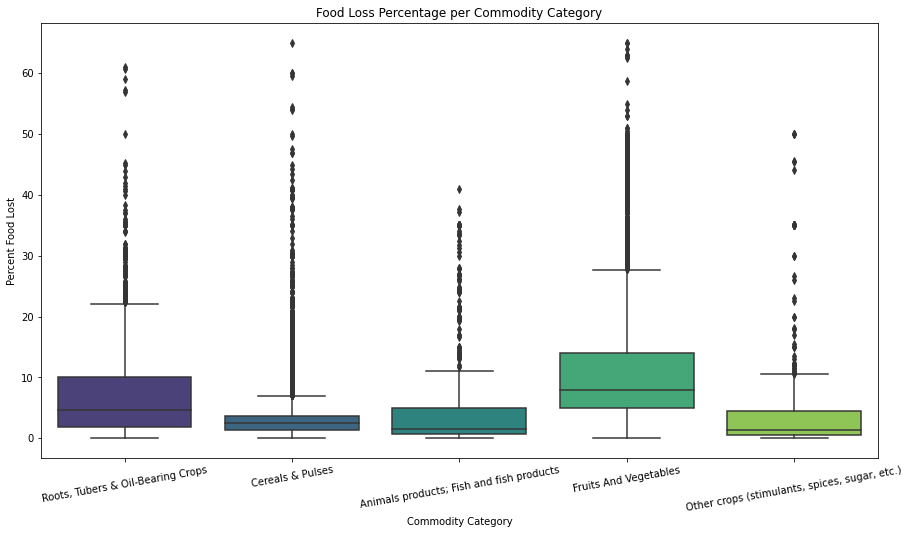

In [65]:
#Create appropriate x and y and plot with dots
x = df['commodity_basket']
y = df['loss_percentage']
plt.figure(figsize=(15,8))

ax = sns.boxplot(x="commodity_basket", y="loss_percentage", data=df, palette = "viridis")

# plt.plot(x,y,'o')
plt.title('Food Loss Percentage per Commodity Category')
plt.xlabel('Commodity Category')
plt.ylabel('Percent Food Lost')
plt.xticks(rotation=10)


Now it's easier to see that 'Fruit and Vegetables' is the category that suffers the worst percentage loss, followed by 'Roots, Tubers and Oil-Bearing Crops'. Both categories also showed the higher variance withing their values compared to the other ones.


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Cereals & Pulses'),
  Text(1, 0, 'Fruits And Vegetables'),
  Text(2, 0, 'Roots, Tubers & Oil-Bearing Crops'),
  Text(3, 0, 'Animals products; Fish and fish products'),
  Text(4, 0, 'Other crops (stimulants, spices, sugar, etc.)')])

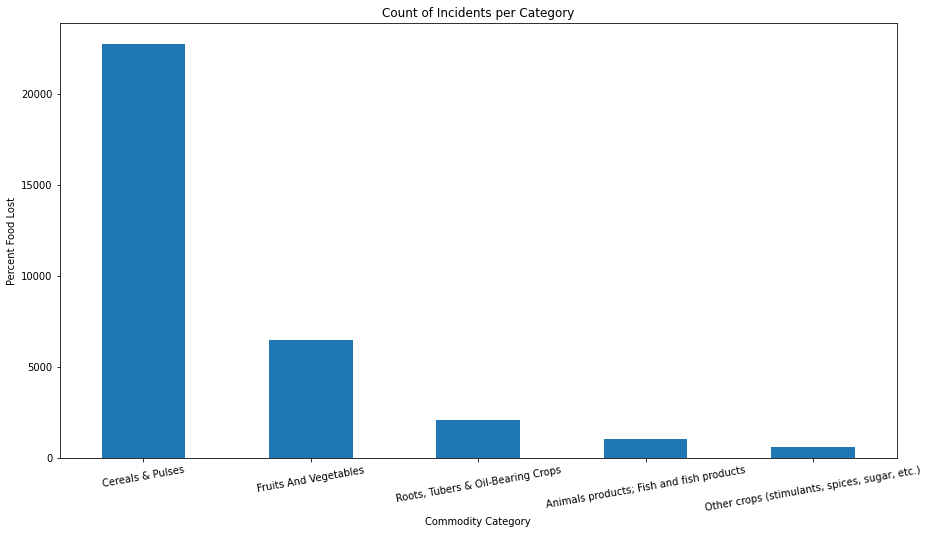

In [70]:
plt.figure(figsize=(15,8))
df['commodity_basket'].value_counts().plot(kind='bar')
plt.title('Count of Incidents per Category')
plt.xlabel('Commodity Category')
plt.ylabel('Percent Food Lost')
plt.xticks(rotation=10)

Nonetheless, it's clear that data collection was heavily focused on Cereals and Pulses while other categories like Animal products show very few recordings in comparison. 

### Food Loss by Decades 

When plotting 'loss percentage' versus 'year' on a scatter plot we will encounter a similar problem as with commodities. Too much clustered data to reasonably explore. So again, let's group by a 10 year range and observe the boxplots. 

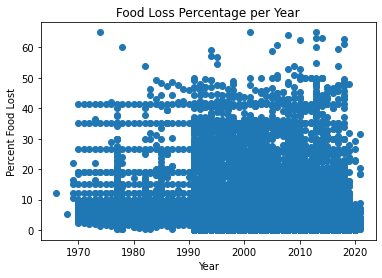

In [71]:
# Evaluate Food Loss over Time
x = df['year']
y = df['loss_percentage']

plt.plot(x,y,'o')
plt.title('Food Loss Percentage per Year')
plt.xlabel('Year')
plt.ylabel('Percent Food Lost')
plt.show()


In [72]:
df['decades'] = (10 * (df['year'] // 10))

[Text(0, 0, '1960s'),
 Text(1, 0, '1970s'),
 Text(2, 0, '1980s'),
 Text(3, 0, '1990s'),
 Text(4, 0, '2000s'),
 Text(5, 0, '2010s'),
 Text(6, 0, '2020s')]

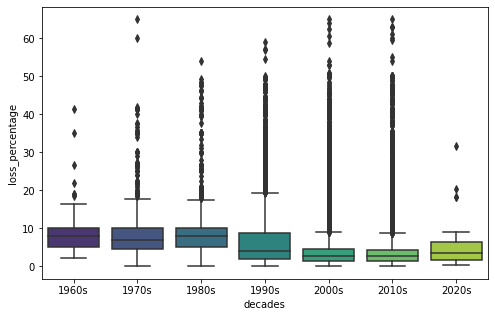

In [10]:
df['decades'] = pd.cut(df['year'], bins=range(1960, 2040, 10))
plt.figure(figsize=(8,5))
ax = sns.boxplot(x="decades", y="loss_percentage", data=df, palette = "viridis")
# ax.set_xticks([0, 1, 2, 3, 4, 5, 6 ], labels=["1960s", "1970s", "1980s", "1990s", "2000s", "2010s"])
ax.set_xticklabels(["1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"])


In [74]:
df.describe()

,m49_code,year,loss_percentage,decades
count,32947.000000,32947.000000,32947.000000,32947.000000
mean,490.287978,2006.743952,5.151613,2002.335569
std,267.932473,9.317634,6.957487,9.331081
min,2.000000,1966.000000,0.003000,1960.000000
25%,250.000000,2002.000000,1.650000,2000.000000
50%,478.000000,2008.000000,2.910000,2000.000000
75%,729.000000,2014.000000,5.000000,2010.000000
max,894.000000,2021.000000,65.000000,2020.000000


Data shows that since 1990, Food loss porcentages have gradually decreased. The interquartile range (where the center 50 percent of the data lies) expands and increases from 1960 to 1990, then contracts and decreases from 1990 to 2020, with a slight increase in the current decade. 
This also shows us that Food Loss is highly concentrated below 10 percent across all decades with a historical mean of 5.15.

### Food Loss by Supply Stage

Now let's explore how Food Loss behaves at during the stages of the food cycle.

In [81]:
sorted_df = df.sort_values(by='loss_percentage',ascending=True)

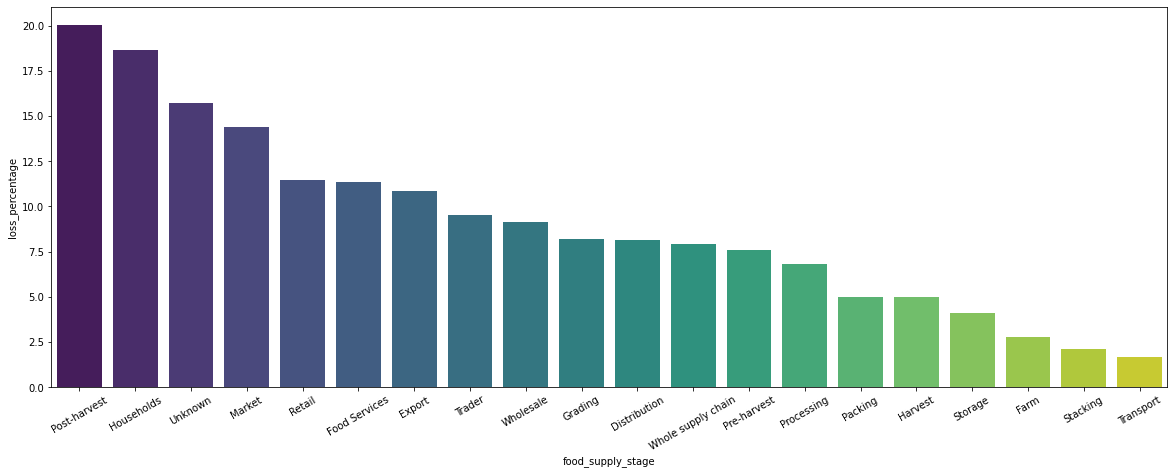

In [95]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
df_sorted_supply = pd.DataFrame(df.groupby('food_supply_stage')['loss_percentage'].mean().sort_values(ascending=False)).reset_index()
ax = sns.barplot(x="food_supply_stage", y="loss_percentage", data=df_sorted_supply, palette = "viridis")


According to the data, the largest food loss occurs at the Post Harvest, Household and Market stages.
Also, it is worth noting that there is incomplete or 'Unknown' data to determine at what stage significant food loss happens. 
 

### Food Loss by Method of Data Collection        

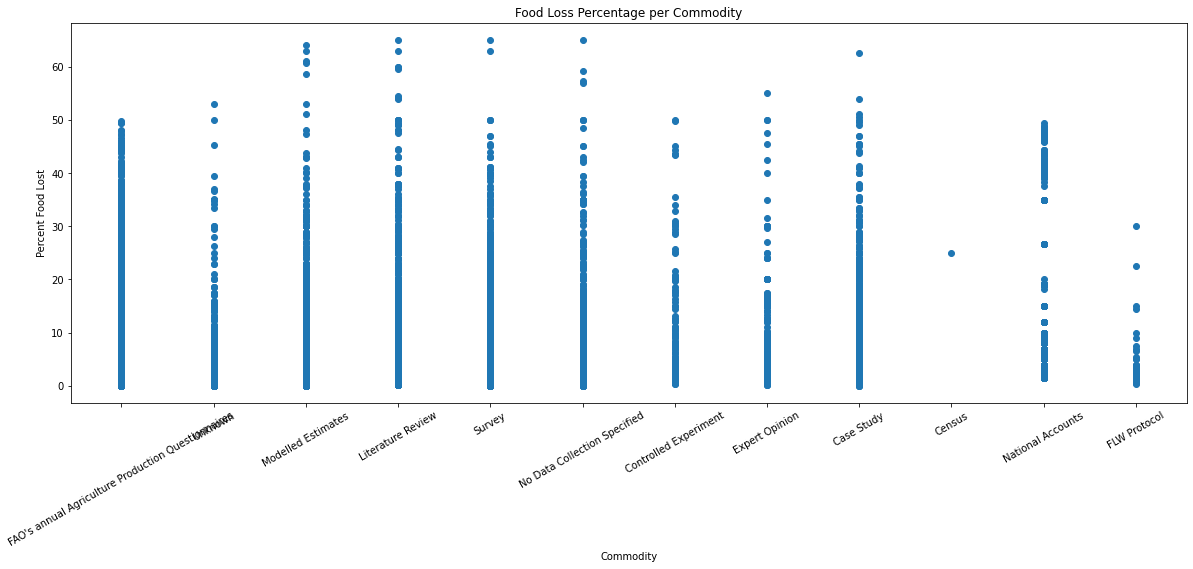

In [90]:
x = df['method_data_collection']
y = df['loss_percentage']
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)

plt.plot(x,y,'o')
plt.title('Food Loss Percentage per Commodity')
plt.xlabel('Commodity')
plt.ylabel('Percent Food Lost')
plt.show()

## Exporting Data Set

Now we can organize the clean dataset and export it for submission to Kaggle. 

In [97]:
df = df.reindex(columns = ['m49_code','country','cpc_code','commodity','commodity_basket','year','decades','loss_percentage','food_supply_stage','method_data_collection'])
df.head()

,m49_code,country,cpc_code,commodity,commodity_basket,year,decades,loss_percentage,food_supply_stage,method_data_collection
0,104,Myanmar,0142,"Groundnuts, excluding shelled","Roots, Tubers & Oil-Bearing Crops",2009,2000,5.22,Whole supply chain,FAO's annual Agriculture Production Questionna...
1,104,Myanmar,0142,"Groundnuts, excluding shelled","Roots, Tubers & Oil-Bearing Crops",2008,2000,5.43,Whole supply chain,FAO's annual Agriculture Production Questionna...
2,104,Myanmar,0142,"Groundnuts, excluding shelled","Roots, Tubers & Oil-Bearing Crops",2007,2000,5.61,Whole supply chain,FAO's annual Agriculture Production Questionna...
3,104,Myanmar,0142,"Groundnuts, excluding shelled","Roots, Tubers & Oil-Bearing Crops",2006,2000,5.40,Whole supply chain,FAO's annual Agriculture Production Questionna...
4,104,Myanmar,0142,"Groundnuts, excluding shelled","Roots, Tubers & Oil-Bearing Crops",2005,2000,5.00,Whole supply chain,FAO's annual Agriculture Production Questionna...


In [99]:
df.to_csv('food_loss_fao_cleaned.csv', encoding='utf-8', index=False)


## Conclusions

Food losses are an extremely complex phenomenon to measure because they are multi-dimensional and
data collection is costly.
A major limitation is data availability. The reported data accounts for a small percentage or the data
needs: only 23 countries out of 185 reported on losses in 2016 for one commodity or more and only 4.4%
of loss factors in the SUA/FBS database are officially reported, all others being estimated
The index is limited in scope as harvest losses cannot be included in the international indicator for
comparability reasons. Moreover, the index covers ten key commodities in each country, because
requesting regular loss data for a larger number of crops would be a difficult and unsustainable exercise
for most countries.
The index covers quantitative losses only, that challenging enough to measure. Qualitative and economic
losses are also very relevant but less consistent out of the scope of the indicator.
This indicator is particularly challenging for countries because it requires several surveys to collect all the
necessary information along the supply chain. The most appropriate data sources would be an ensemble
of surveys however, most countries lack the capacity and resources to carry out this exercise. A suite of
statistical and modelling tools, combined where possible with administrative records will have to be used.

In [ ]:
df_com.sort_values(by=['loss_percentage'], ascending = False)


/tmp/ipykernel_15393/3082470916.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')


<AxesSubplot:>

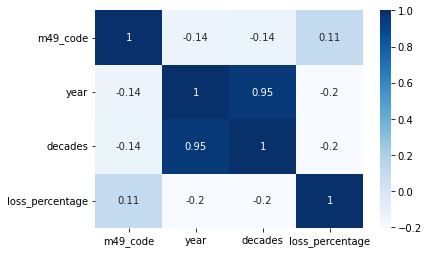

In [85]:

sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
#df.sort_values(by=["commodity"]) 

In [ ]:
# df['year']='2021'
# df

In [ ]:
df.shape

In [ ]:
country_df = df.groupby('country')['commodity']['loss_quantity']
pd.DataFrame(country_df)

In [ ]:
year_df = df.groupby('year')['loss_quantity']
pd.DataFrame(year_df)

In [ ]:
country_df.plot(kind="bar")

Comments and limitations:
Food losses are an extremely complex phenomenon to measure because they are multi-dimensional and
data collection is costly.
A major limitation is data availability. The reported data accounts for a small percentage or the data
needs: only 23 countries out of 185 reported on losses in 2016 for one commodity or more and only 4.4%
of loss factors in the SUA/FBS database are officially reported, all others being estimated
The index is limited in scope as harvest losses cannot be included in the international indicator for
comparability reasons. Moreover, the index covers ten key commodities in each country, because
requesting regular loss data for a larger number of crops would be a difficult and unsustainable exercise
for most countries.
The index covers quantitative losses only, that challenging enough to measure. Qualitative and economic
losses are also very relevant but less consistent out of the scope of the indicator.
This indicator is particularly challenging for countries because it requires several surveys to collect all the
necessary information along the supply chain. The most appropriate data sources would be an ensemble
of surveys however, most countries lack the capacity and resources to carry out this exercise. A suite of
statistical and modelling tools, combined where possible with administrative records will have to be used.

Moving from global food loss and waste estimates to the commodity, country, and stage level will vastly improve our knowledge of the food losses problem and present opportunities for intervention.

In [ ]:
df_fao = pd.read_excel('faoStats.xlsx')
df_fao

In [ ]:
df_fao.to_csv('csvfile.csv', encoding='utf-8', index=False)


Hypothesis

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
df.tail()

In [ ]:
df_method = df['method_data_collection'].value_counts()
df_method

In [ ]:
df.sample(5)

### COMMODITY BASKETS CLASSIFICATION

In [161]:
df_fao_codes = pd.read_csv('FLI Commodity Baskets and corresponding CPC codes (Annex 2) - Table 12.csv') 


In [162]:
df_fao_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Annex 2: FLI Commodity Baskets and corresponding CPC codes  6 non-null      float64
 1   Unnamed: 1                                                  7 non-null      object 
 2   Unnamed: 2                                                  16 non-null     object 
 3   Unnamed: 3                                                  17 non-null     object 
dtypes: float64(1), object(3)
memory usage: 672.0+ bytes


In [163]:
df_fao_codes.head(5)

,Annex 2: FLI Commodity Baskets and corresponding CPC codes,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,GFLI Basket,FBS Group,Crop (CPC Heading)
1,1.0,Cereals & Pulses,Cereals,"Wheat (111), Maize (Corn) (112), Rice (113), S..."
2,NaN,NaN,Pulses,"Beans, Dry (1701), Broad Beans And Horse..."
3,2.0,Fruits & Vegetables,Fruits,"Avocados (1311), Bananas (1312), Plantains And..."
4,NaN,NaN,Vegetables,"Asparagus (1211), Cabbages (1212), Cauliflower..."


In [164]:
df_fao_codes.columns = ['Index','GFLI Basket', 'FBS Group', 'Crop']

In [165]:
# df_fao_codes['Crop'] = df_fao_codes['Crop'].astype("string")

In [166]:
df_fao_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        6 non-null      float64
 1   GFLI Basket  7 non-null      object 
 2   FBS Group    16 non-null     object 
 3   Crop         17 non-null     object 
dtypes: float64(1), object(3)
memory usage: 672.0+ bytes


In [167]:
df_fao_codes.head(2)

,Index,GFLI Basket,FBS Group,Crop
0,NaN,GFLI Basket,FBS Group,Crop (CPC Heading)
1,1.0,Cereals & Pulses,Cereals,"Wheat (111), Maize (Corn) (112), Rice (113), S..."


In [168]:
import re

# cpc_codes = df_fao_codes['Crop'].str.extractall(r'(\(\d)')
# cpc_codes = df_fao_codes['Crop'].str.extractall('\^(.*?)),/')

# new_fao = df_fao_codes['Crop'].str.split("\)\,", expand = False)
new_fao = df_fao_codes['Crop'].str.split("(?<=\d)\)\,", expand=False)
 

In [169]:
df_new_fao = pd.DataFrame(new_fao.explode())

In [170]:
df_new_fao['Crop']= df_new_fao['Crop'].astype("string")

In [171]:
df_new_fao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Crop    270 non-null    string
dtypes: string(1)
memory usage: 4.2 KB


In [172]:
# cpc = df_new_fao['Crop'].str.findall('[0-9]+')
# cpc = df_new_fao['Crop'].str.findall('(\d+\.?\d*)')
cpc = df_new_fao['Crop'].str.extract('(\d+\.?\d*)')


In [173]:
# test = df_new_fao['Crop'].str.findall('[0-9]+')

In [174]:
# test[5]

In [243]:
# test.tail()

In [175]:
cpc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       267 non-null    string
dtypes: string(1)
memory usage: 4.2 KB


In [176]:
cpc[0]

0         <NA>
1          111
1          112
1          113
1          114
        ...   
16       21423
16       21424
16    21429.01
16    21429.02
16        0235
Name: 0, Length: 270, dtype: string

In [177]:
df_new_fao

,Crop
0,Crop (CPC Heading)
1,Wheat (111
1,Maize (Corn) (112
1,Rice (113
1,Sorghum (114
...,...
16,"Hazelnuts, Shelled (21423"
16,"Cashew Nuts, Shelled (21424"
16,"Brazil Nuts, Shelled (21429.01"
16,"Walnuts, Shelled (21429.02"


In [178]:
df_final = pd.DataFrame(df_new_fao['Crop'].str.replace('\((\d+\.?\d*)', ''))

/tmp/ipykernel_14598/2980939189.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final = pd.DataFrame(df_new_fao['Crop'].str.replace('\((\d+\.?\d*)', ''))


In [179]:
# df_final.replace(r' \(','')

In [180]:
df_final['cpc_code']=cpc[0]

In [181]:
df_final.reset_index(inplace=True)

In [182]:
df_final.rename(columns={'index': 'FBS Group'}, inplace=True)

In [183]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FBS Group  270 non-null    int64 
 1   Crop       270 non-null    string
 2   cpc_code   267 non-null    string
dtypes: int64(1), string(2)
memory usage: 6.5 KB


In [184]:
df_final[df_final['FBS Group']==15]

,FBS Group,Crop,cpc_code
250,15,Sugar Beet,1801
251,15,Sugar Cane,1802
252,15,Other Sugar Crops N.E.C.,1809
253,15,Natural Honey ),2910


In [185]:
df_fao_codes['GFLI Basket'].values

array(['GFLI Basket', 'Cereals & Pulses', nan, 'Fruits & Vegetables', nan,
       'Roots,  Tubers  &  Oil- Bearing Crops', nan,
       'Animals  And  Animal Products', nan, nan, nan, nan,
       'Fish & Fish Products', 'Other', nan, nan, nan], dtype=object)

In [186]:
fbs_group = {
    1:'Cereals',
    2:'Pulses',
    3:'Fruits',
    4:'Vegetables',
    5:'Oil Crops',
    6:'Roots, Tubers & Products',
    7:'Animal fats',
    8:'Eggs',
    9:'Meat',
    10:'Milk and Dairy',
    11:'Fish & Fisheries Products',
    12:'Spices',
    13:'Stimulants',
    14:'Sugars & Syrups',
    15:'Sugars & Syrups',
    16:'Tree Nuts'
}

global_index = {
    1:'Cereals & Pulses',
    2:'Cereals & Pulses',
    3:'Fruits & Vegetables',
    4:'Fruits & Vegetables',
    5:'Roots,  Tubers  &  Oil- Bearing Crops',
    6:'Roots,  Tubers  &  Oil- Bearing Crops',
    7:'Animals  And  Animal Products',
    8:'Animals  And  Animal Products',
    9:'Animals  And  Animal Products',
    10:'Animals  And  Animal Products',
    11:'Fish & Fish Products',
    12:'Other',
    13:'Other',
    14:'Other',
    15:'Other',
    16:'Other',
}


In [187]:
df_final['FBS Group Name'] = df_final['FBS Group'].map(fbs_group)

In [188]:
df_final['GFLI Basket Name'] = df_final['FBS Group'].map(global_index)

In [190]:
# df_final= df_final.iloc[1: , :]

In [191]:
df_final

,FBS Group,Crop,cpc_code,FBS Group Name,GFLI Basket Name
1,1,Wheat,111,Cereals,Cereals & Pulses
2,1,Maize (Corn),112,Cereals,Cereals & Pulses
3,1,Rice,113,Cereals,Cereals & Pulses
4,1,Sorghum,114,Cereals,Cereals & Pulses
5,1,Barley,115,Cereals,Cereals & Pulses
...,...,...,...,...,...
265,16,"Hazelnuts, Shelled",21423,Tree Nuts,Other
266,16,"Cashew Nuts, Shelled",21424,Tree Nuts,Other
267,16,"Brazil Nuts, Shelled",21429.01,Tree Nuts,Other
268,16,"Walnuts, Shelled",21429.02,Tree Nuts,Other


In [192]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 1 to 269
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FBS Group         269 non-null    int64 
 1   Crop              269 non-null    string
 2   cpc_code          267 non-null    string
 3   FBS Group Name    269 non-null    object
 4   GFLI Basket Name  269 non-null    object
dtypes: int64(1), object(2), string(2)
memory usage: 10.6+ KB


In [193]:
df_final.loc[df_final['cpc_code'].isnull()]

,FBS Group,Crop,cpc_code,FBS Group Name,GFLI Basket Name
171,9,"Meat Of Pig With The Bone,",<NA>,Meat,Animals And Animal Products
221,11,,<NA>,Fish & Fisheries Products,Fish & Fish Products


In [195]:
df_final['cpc_code'] = df_final['cpc_code'].str.zfill(4)

/tmp/ipykernel_14598/3734284493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cpc_code'] = df_final['cpc_code'].str.zfill(4)


In [196]:
df_final.loc[df_final['cpc_code']=='0142']

,FBS Group,Crop,cpc_code,FBS Group Name,GFLI Basket Name
111,5,"Groundnuts, Excluding Shelled",0142,Oil Crops,"Roots, Tubers & Oil- Bearing Crops"


In [197]:
df_final.at[171,'cpc_code']='21113.01'
df_final.at[171,'Crop']='Meat Of Pig With The Bone, Fresh Or Chilled'

In [198]:
df_final.loc[df_final['FBS Group']==9]


,FBS Group,Crop,cpc_code,FBS Group Name,GFLI Basket Name
167,9,"Snails, Fresh, Chilled, Frozen, Dried, Salted ...",2920,Meat,Animals And Animal Products
168,9,"Meat Of Cattle With The Bone, Fresh Or ...",21111.01,Meat,Animals And Animal Products
169,9,"Meat Of Cattle Boneless, Fresh Or Chilled",21111.02,Meat,Animals And Animal Products
170,9,"Meat Of Buffalo, Fresh Or Chilled",21112,Meat,Animals And Animal Products
171,9,"Meat Of Pig With The Bone, Fresh Or Chilled",21113.01,Meat,Animals And Animal Products


In [199]:
df_final.loc[df_final['FBS Group']==5]

,FBS Group,Crop,cpc_code,FBS Group Name,GFLI Basket Name
110,5,Soya Beans,0141,Oil Crops,"Roots, Tubers & Oil- Bearing Crops"
111,5,"Groundnuts, Excluding Shelled",0142,Oil Crops,"Roots, Tubers & Oil- Bearing Crops"
112,5,Cottonseed,0143,Oil Crops,"Roots, Tubers & Oil- Bearing Crops"
113,5,Linseed,1441,Oil Crops,"Roots, Tubers & Oil- Bearing Crops"
114,5,Mustard Seed,1442,Oil Crops,"Roots, Tubers & Oil- Bearing Crops"
115,5,Rapeseed Or Colza Seed,1443,Oil Crops,"Roots, Tubers & Oil- Bearing Crops"
116,5,Sesame Seed,1444,Oil Crops,"Roots, Tubers & Oil- Bearing Crops"
117,5,Sunflower Seed,1445,Oil Crops,"Roots, Tubers & Oil- Bearing Crops"
118,5,Safflower Seed,1446,Oil Crops,"Roots, Tubers & Oil- Bearing Crops"
119,5,Castor Oil Seeds,1447,Oil Crops,"Roots, Tubers & Oil- Bearing Crops"


In [200]:
df_final.loc[df_final['cpc_code'].isnull()]

,FBS Group,Crop,cpc_code,FBS Group Name,GFLI Basket Name
221,11,,<NA>,Fish & Fisheries Products,Fish & Fish Products


In [201]:
# Brute force
# df_final.drop([221],inplace=True)

/tmp/ipykernel_14598/3334891440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop([221],inplace=True)


In [248]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 1 to 269
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FBS Group         268 non-null    int64 
 1   Crop              268 non-null    string
 2   cpc_code          268 non-null    string
 3   FBS Group Name    268 non-null    object
 4   GFLI Basket Name  268 non-null    object
dtypes: int64(1), object(2), string(2)
memory usage: 12.6+ KB


In [203]:
df_final

,FBS Group,Crop,cpc_code,FBS Group Name,GFLI Basket Name
1,1,Wheat,0111,Cereals,Cereals & Pulses
2,1,Maize (Corn),0112,Cereals,Cereals & Pulses
3,1,Rice,0113,Cereals,Cereals & Pulses
4,1,Sorghum,0114,Cereals,Cereals & Pulses
5,1,Barley,0115,Cereals,Cereals & Pulses
...,...,...,...,...,...
265,16,"Hazelnuts, Shelled",21423,Tree Nuts,Other
266,16,"Cashew Nuts, Shelled",21424,Tree Nuts,Other
267,16,"Brazil Nuts, Shelled",21429.01,Tree Nuts,Other
268,16,"Walnuts, Shelled",21429.02,Tree Nuts,Other


In [249]:
df_final.to_csv('commodity_by_baskets.csv')


## Merge two dataframes

In [213]:
df_inner = df_final.merge(df, on='cpc_code', how='inner') 

In [214]:
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22034 entries, 0 to 22033
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FBS Group                 22034 non-null  int64  
 1   Crop                      22034 non-null  string 
 2   cpc_code                  22034 non-null  object 
 3   FBS Group Name            22034 non-null  object 
 4   GFLI Basket Name          22034 non-null  object 
 5   m49_code                  22034 non-null  int64  
 6   country                   22034 non-null  object 
 7   commodity                 22034 non-null  object 
 8   year                      22034 non-null  int64  
 9   loss_percentage           22034 non-null  float64
 10  loss_percentage_original  22034 non-null  object 
 11  activity                  22034 non-null  object 
 12  food_supply_stage         22034 non-null  object 
 13  method_data_collection    22034 non-null  object 
dtypes: flo

In [216]:
df_left = df_final.merge(df, on='cpc_code', how='left') 

In [250]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22266 entries, 0 to 22265
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FBS Group                 22266 non-null  int64  
 1   Crop                      22266 non-null  string 
 2   cpc_code                  22266 non-null  object 
 3   FBS Group Name            22266 non-null  object 
 4   GFLI Basket Name          22266 non-null  object 
 5   m49_code                  22034 non-null  float64
 6   country                   22034 non-null  object 
 7   commodity                 22034 non-null  object 
 8   year                      22034 non-null  float64
 9   loss_percentage           22034 non-null  float64
 10  loss_percentage_original  22034 non-null  object 
 11  activity                  22034 non-null  object 
 12  food_supply_stage         22034 non-null  object 
 13  method_data_collection    22034 non-null  object 
dtypes: flo

In [233]:
df_outer = df_final.merge(df, on='cpc_code', how='outer') 
df_outer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33280 entries, 0 to 33279
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FBS Group                 22266 non-null  float64
 1   Crop                      22266 non-null  string 
 2   cpc_code                  33280 non-null  object 
 3   FBS Group Name            22266 non-null  object 
 4   GFLI Basket Name          22266 non-null  object 
 5   m49_code                  33048 non-null  float64
 6   country                   33048 non-null  object 
 7   commodity                 33048 non-null  object 
 8   year                      33048 non-null  float64
 9   loss_percentage           33048 non-null  float64
 10  loss_percentage_original  33048 non-null  object 
 11  activity                  33048 non-null  object 
 12  food_supply_stage         33048 non-null  object 
 13  method_data_collection    33048 non-null  object 
dtypes: flo

In [ ]:
df_outer.drop(columns='Crop',inplace=True)
df_outer

In [246]:
df_outer.columns

Index(['commodity', 'cpc_code', 'FBS Group', 'FBS Group Name',
       'GFLI Basket Name', 'm49_code', 'country', 'year', 'loss_percentage',
       'loss_percentage_original', 'activity', 'food_supply_stage',
       'method_data_collection'],
      dtype='object')

In [247]:
df_outer

,commodity,cpc_code,FBS Group,FBS Group Name,GFLI Basket Name,m49_code,country,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,Wheat,0111,1.0,Cereals,Cereals & Pulses,108.0,Burundi,2020.0,3.50,3.5,"Shelling, Threshing",Farm,Modelled Estimates
1,Wheat,0111,1.0,Cereals,Cereals & Pulses,108.0,Burundi,2020.0,4.87,4.87,Storage,Farm,Modelled Estimates
2,Wheat,0111,1.0,Cereals,Cereals & Pulses,108.0,Burundi,2020.0,2.50,2.5,Transportation,Farm,Modelled Estimates
3,Wheat,0111,1.0,Cereals,Cereals & Pulses,108.0,Burundi,2020.0,4.43,4.43,"Drying, Harvesting",Harvest,Modelled Estimates
4,Wheat,0111,1.0,Cereals,Cereals & Pulses,108.0,Burundi,2019.0,4.43,4.43,"Drying, Harvesting",Harvest,Modelled Estimates
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33275,Bran of Maize,39120.04,NaN,NaN,NaN,862.0,Venezuela (Bolivarian Republic of),1995.0,1.79,1.79%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
33276,Bran of Maize,39120.04,NaN,NaN,NaN,862.0,Venezuela (Bolivarian Republic of),1994.0,1.70,1.7%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
33277,Bran of Maize,39120.04,NaN,NaN,NaN,862.0,Venezuela (Bolivarian Republic of),1993.0,1.78,1.78%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
33278,Bran of Maize,39120.04,NaN,NaN,NaN,862.0,Venezuela (Bolivarian Republic of),1992.0,1.85,1.85%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...


In [236]:
df_outer = df_outer.reindex(columns = ['commodity','cpc_code','FBS Group','FBS Group Name','GFLI Basket Name','m49_code','country','year','loss_percentage', 'loss_percentage_original','activity','food_supply_stage','method_data_collection'])
df_outer

,commodity,cpc_code,FBS Group,FBS Group Name,GFLI Basket Name,m49_code,country,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,Wheat,0111,1.0,Cereals,Cereals & Pulses,108.0,Burundi,2020.0,3.50,3.5,"Shelling, Threshing",Farm,Modelled Estimates
1,Wheat,0111,1.0,Cereals,Cereals & Pulses,108.0,Burundi,2020.0,4.87,4.87,Storage,Farm,Modelled Estimates
2,Wheat,0111,1.0,Cereals,Cereals & Pulses,108.0,Burundi,2020.0,2.50,2.5,Transportation,Farm,Modelled Estimates
3,Wheat,0111,1.0,Cereals,Cereals & Pulses,108.0,Burundi,2020.0,4.43,4.43,"Drying, Harvesting",Harvest,Modelled Estimates
4,Wheat,0111,1.0,Cereals,Cereals & Pulses,108.0,Burundi,2019.0,4.43,4.43,"Drying, Harvesting",Harvest,Modelled Estimates
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33275,Bran of Maize,39120.04,NaN,NaN,NaN,862.0,Venezuela (Bolivarian Republic of),1995.0,1.79,1.79%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
33276,Bran of Maize,39120.04,NaN,NaN,NaN,862.0,Venezuela (Bolivarian Republic of),1994.0,1.70,1.7%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
33277,Bran of Maize,39120.04,NaN,NaN,NaN,862.0,Venezuela (Bolivarian Republic of),1993.0,1.78,1.78%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
33278,Bran of Maize,39120.04,NaN,NaN,NaN,862.0,Venezuela (Bolivarian Republic of),1992.0,1.85,1.85%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...


In [243]:
display(df_outer.dtypes)

commodity                    object
cpc_code                     object
FBS Group                   float64
FBS Group Name               object
GFLI Basket Name             object
m49_code                    float64
country                      object
year                        float64
loss_percentage             float64
loss_percentage_original     object
activity                     object
food_supply_stage            object
method_data_collection       object
dtype: object

In [260]:
df_outer[df_outer['m49_code'].isnull()].sample(60)

,commodity,cpc_code,FBS Group,FBS Group Name,GFLI Basket Name,m49_code,country,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
20846,NaN,1312,3.0,Fruits,Fruits & Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21259,NaN,1499.06,5.0,Oil Crops,"Roots, Tubers & Oil- Bearing Crops",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20865,NaN,1344.02,3.0,Fruits,Fruits & Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20893,NaN,0623,3.0,Fruits,Fruits & Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21675,NaN,2920,9.0,Meat,Animals And Animal Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20864,NaN,1344.01,3.0,Fruits,Fruits & Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21278,NaN,21495.01,5.0,Oil Crops,"Roots, Tubers & Oil- Bearing Crops",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20888,NaN,21491,3.0,Fruits,Fruits & Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20866,NaN,1345,3.0,Fruits,Fruits & Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22249,NaN,2910,15.0,Sugars & Syrups,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
df_outer = df_outer.dropna(subset=['m49_code'])

In [262]:
df_outer['m49_code'] = df_outer['m49_code'].apply(np.int64)

/tmp/ipykernel_14598/90041581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outer['m49_code'] = df_outer['m49_code'].apply(np.int64)


In [263]:
df_outer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33048 entries, 0 to 33279
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   commodity                 33048 non-null  object 
 1   cpc_code                  33048 non-null  object 
 2   FBS Group                 22034 non-null  float64
 3   FBS Group Name            22034 non-null  object 
 4   GFLI Basket Name          22034 non-null  object 
 5   m49_code                  33048 non-null  int64  
 6   country                   33048 non-null  object 
 7   year                      33048 non-null  float64
 8   loss_percentage           33048 non-null  float64
 9   loss_percentage_original  33048 non-null  object 
 10  activity                  33048 non-null  object 
 11  food_supply_stage         33048 non-null  object 
 12  method_data_collection    33048 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.5+ MB


In [270]:
df_outer[df_outer['FBS Group Name'].isnull()]

,commodity,cpc_code,FBS Group,FBS Group Name,GFLI Basket Name,m49_code,country,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
22266,"Beans, dry",01701,NaN,NaN,NaN,108,Burundi,1992.0,30.00,30,Unknown,Storage,Literature Review
22267,"Beans, dry",01701,NaN,NaN,NaN,124,Canada,2003.0,1.99,1.99%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
22268,"Beans, dry",01701,NaN,NaN,NaN,124,Canada,2002.0,1.97,1.97%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
22269,"Beans, dry",01701,NaN,NaN,NaN,124,Canada,2001.0,2.00,2%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
22270,"Beans, dry",01701,NaN,NaN,NaN,124,Canada,2000.0,2.00,2%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33275,Bran of Maize,39120.04,NaN,NaN,NaN,862,Venezuela (Bolivarian Republic of),1995.0,1.79,1.79%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
33276,Bran of Maize,39120.04,NaN,NaN,NaN,862,Venezuela (Bolivarian Republic of),1994.0,1.70,1.7%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
33277,Bran of Maize,39120.04,NaN,NaN,NaN,862,Venezuela (Bolivarian Republic of),1993.0,1.78,1.78%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
33278,Bran of Maize,39120.04,NaN,NaN,NaN,862,Venezuela (Bolivarian Republic of),1992.0,1.85,1.85%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...


In [317]:
df_outer.columns

Index(['commodity', 'cpc_code', 'FBS Group', 'FBS Group Name',
       'GFLI Basket Name', 'm49_code', 'country', 'year', 'loss_percentage',
       'loss_percentage_original', 'activity', 'food_supply_stage',
       'method_data_collection'],
      dtype='object')

In [330]:
df_outer['FBS Group Name'].isnull().sum()


11014

In [327]:
#Create appropriate x and y and plot with dots
x = df_outer['FBS Group Name']
y = df_outer['loss_percentage']
plt.figure(figsize=(15,8))

ax = sns.boxplot(x="FBS Group Name", y="loss_percentage", data=df, palette = "viridis")

# plt.plot(x,y,'o')
plt.title('Food Loss Percentage per Commodity Category')
plt.xlabel('Commodity Category')
plt.ylabel('Percent Food Lost')
plt.xticks(rotation=10)

ValueError: Could not interpret input 'FBS Group Name'

<Figure size 1080x576 with 0 Axes>

In [265]:
df_outer.to_csv('df_outer.csv')


In [326]:
df_nas = df_outer.loc[df_outer['FBS Group Name']].isna()
df_nas

KeyError: "None of [Index(['Cereals', 'Cereals', 'Cereals', 'Cereals', 'Cereals', 'Cereals',\n       'Cereals', 'Cereals', 'Cereals', 'Cereals',\n       ...\n             nan,       nan,       nan,       nan,       nan,       nan,\n             nan,       nan,       nan,       nan],\n      dtype='object', length=33048)] are in the [index]"

In [219]:
if len(df['cpc_code'])==4:
    count += 1
print(count)



0


In [97]:
print(len(df['cpc_code']))

32947


In [132]:
count = 0
cpc_list = []
for cpc in df['cpc_code']:
    if len(str(cpc)) == 3:
        count += 1
print(count)


176


## Exploring other datasets

In [271]:
df_what = pd.read_csv('FCL_CPC21_mappings_2020-01-07.csv')

In [273]:
df_what

,FCL code,FCL label,CPC21 code,If partial
0,15,Wheat,111,*
1,15,Wheat,1111,*
2,15,Wheat,1112,*
3,16,Flour of Wheat,23110,*
4,16,Flour of Wheat,23130,*
...,...,...,...,...
208,1294,Seeds for Planting,1803,*
209,1294,Seeds for Planting,1940,*
210,1294,Seeds for Planting,1260,*
211,1294,Seeds for Planting,1360,*


In [274]:
df_ok = pd.read_csv('FCL_CPC21AG_mappings_2020-01-07.csv')

In [ ]:
search_df_ok = df_ok.loc[df_ok['FCL code'] ==2]
search_df_ok

In [275]:
df_ok

,FCL code,FCL label,CPC21AG code,If partial
0,20,Bread,23490.90,*
1,38,Flour of Rice,23120.01,*
2,48,Barley Flour and Grits,23120.02,*
3,51,Beer of Barley,24310.01,*
4,58,Flour of Maize,23120.03,*
...,...,...,...,...
337,1292,Other resins,3219.90,NaN
338,1293,Crude Organic Materials nes,1990.90,*
339,1293,Crude Organic Materials nes,1930.90,*
340,1293,Crude Organic Materials nes,39110.90,*


In [276]:
df_ya = pd.read_csv('CPC21_ICC10_mappings_2020-01-07.csv')

In [277]:
df_ya

,CPC21 code,CPC21 label,ICC10 code,If partial
0,1111,"Wheat, seed",11,*
1,1111,"Wheat, seed",192,*
2,1112,"Wheat, other",11,*
3,1112,"Wheat, other",192,*
4,1121,"Maize (corn), seed",12,*
...,...,...,...,...
137,1962,Cut flowers and flower buds including bouquets...,952,*
138,1970,Unmanufactured tobacco,96,*
139,1990,"Other raw vegetable materials, n.e.c.",932,*
140,1990,"Other raw vegetable materials, n.e.c.",991,*


In [278]:
df_ag = pd.read_csv('CPC21_FCL.csv')
df_ag

,CPC21 code,CPC21 label,FCL corr.,FCL partial corr.
0,111,Wheat,NaN,0015
1,1111,"Wheat, seed",NaN,0015
2,1112,"Wheat, other",NaN,0015
3,112,Maize (corn),NaN,0056
4,1121,"Maize (corn), seed",NaN,0056
...,...,...,...,...
363,39212,Waste of wool or of fine or coarse animal hair,NaN,1009
364,39213,Garnetted stock of wool or of fine or coarse a...,1007,NaN
365,39214,"Cotton waste, except garnetted stock",NaN,0769
366,39215,Other cotton waste; garnetted stock,NaN,0769


In [279]:
df_ye = pd.read_csv('FCL_CPC20_mappings_2020-01-07.csv')


In [280]:
df_ye

,FCL code,FCL label,CPC20 code,If partial
0,15,Wheat,1111,*
1,15,Wheat,1112,*
2,16,Flour of Wheat,23110,*
3,16,Flour of Wheat,23130,*
4,17,Bran of Wheat,39120,*
...,...,...,...,...
906,310540,Monoammonium phosphate (MAP),34643,*
907,310551,Other nitrogen & phosphates compounds,34644,*
908,310559,Other nitrogen & phosphorus compounds,34644,*
909,310560,PK compounds,34645,*


In [286]:
df_ns = pd.read_csv('FCL_ICC10_mappings_2020-01-07.csv')
df_ns



,FCL code,FCL label,ICC10 code,If partial
0,15,Wheat,11,*
1,15,Wheat,192,*
2,56,Maize,12,*
3,79,Millet,18,*
4,83,Sorghum,14,*
5,83,Sorghum,18,*
6,135,Yautia (Cocoyam),59,*
7,161,Sugar crops nes,992,*
8,176,"Beans, dry",71,*
9,181,"Broad beans, dry",72,*


In [298]:
fcl_code_dict = {
    1:'CEREALS',
    2:'ROOTS AND TUBERS AND DERIVED PRODUCTS',
    3:'SUGAR CROPS AND SWEETENERS AND DERIVED PRODUCTS',
    4:'PULSES AND DERIVED PRODUCTS',
    5:'NUTS AND DERIVED PRODUCTS',
    6:'OIL-BEARING CROPS',
    7:'VEGETABLES AND DERIVED PRODUCTS',
    8:'FRUITS AND DERIVED PRODUCTS',
    9:'FIBRES OF VEGETAL AND ANIMAL ORIGIN',
    10:'SPICES',
    11:'FODDER CROPS AND PRODUCTS',
    12:'STIMULANT CROPS AND DERIVED PRODUCTS',
    13:'TOBACCO AND RUBBER AND OTHER CROPSS',
    14:'VEGETABLE AND ANIMAL OILS AND FATS',
    15:'BEVERAGES',
    16:'LIVESTOCK',
    17:'VEGETABLE AND ANIMAL OILS AND FATS',
    18:'PRODUCTS FROM LIVE ANIMALS',
    19:'HIDES AND SKINS',
    20:'OTHER LIVESTOCK PRODUCTS',
    21:'PESTICIDES',
    22:'FERTILIZERS',
    23:"MACHINERY"
    
}

In [301]:
df_groups = pd.read_csv('Data_Groups.csv')
df_groups.head()

/tmp/ipykernel_14598/4192344236.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_groups = pd.read_csv('Data_Groups.csv')


,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,1,World,NaN,01239.90,Other fruit-bearing vegetables n.e.c.,2011,40.00,30 - 50%,NaN,"Cleaning, Collection, Distribution, Drying, Fi...",Whole supply chain,NaN,"Biological, Microbiological, Chemical, Biochem...",NaN,National Accounts,"Atanda S. A. et al, 2011",NaN,NaN
1,1,World,NaN,01199,Other cereals n.e.c.,2011,19.00,19,NaN,NaN,Whole supply chain,NaN,NaN,NaN,Modelled Estimates,"Lipinski, B. et al. 2013. “Reducing Food Loss ...",http://www.worldresourcesreport.org,NaN
2,1,World,NaN,21,"Meat, fish, fruits, vegetables, oils and fats",2009,24.00,24%,NaN,"Cleaning, Collection, Distribution, Drying, Fi...",Whole supply chain,NaN,NaN,NaN,Case Study,"Waite R. et al, 2009",NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN


In [314]:
df_groups.nunique()

m49_code                     159
country                      160
region                       200
cpc_code                     299
commodity                    259
year                          56
loss_percentage             2258
loss_percentage_original    3903
loss_quantity               4560
activity                     130
food_supply_stage             19
treatment                    372
cause_of_loss                516
sample_size                  244
method_data_collection        11
reference                    488
url                          129
notes                        177
dtype: int64

In [316]:
df.nunique()

m49_code                     157
country                      158
cpc_code                     188
commodity                    202
year                          55
loss_percentage             2232
loss_percentage_original    3769
activity                     121
food_supply_stage             20
method_data_collection        12
dtype: int64

In [302]:
df.head()

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
1,104,Myanmar,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
2,104,Myanmar,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
3,104,Myanmar,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
4,104,Myanmar,0142,"Groundnuts, excluding shelled",2005,5.00,5%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...


In [306]:
searching = df_groups.loc[df_groups['cpc_code'] =='01199']
searching.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
1,1,World,NaN,01199,Other cereals n.e.c.,2011,19.0,19,NaN,NaN,Whole supply chain,NaN,NaN,NaN,Modelled Estimates,"Lipinski, B. et al. 2013. “Reducing Food Loss ...",http://www.worldresourcesreport.org,NaN
2344,150,Europe,NaN,01199,Other cereals n.e.c.,2013,2.0,2,NaN,NaN,Pre-harvest,NaN,NaN,NaN,Modelled Estimates,Waste Management & Research 32(8),NaN,NaN
2345,150,Europe,NaN,01199,Other cereals n.e.c.,2013,4.0,4,NaN,NaN,Harvest,NaN,NaN,NaN,Modelled Estimates,Waste Management & Research 32(8),NaN,NaN
2346,150,Europe,NaN,01199,Other cereals n.e.c.,2013,25.0,25,NaN,NaN,Households,NaN,NaN,NaN,Modelled Estimates,Waste Management & Research 32(8),NaN,NaN
2347,150,Europe,NaN,01199,Other cereals n.e.c.,2013,10.0,10,NaN,NaN,Processing,NaN,NaN,NaN,Modelled Estimates,Waste Management & Research 32(8),NaN,NaN


In [312]:
searching_2 = df.loc[df['cpc_code'] =='01199']

searching_2.head()

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection


In [332]:
df_txt = pd.read_csv('view-source_https___unstats.un.csv')
df_txt

,"""CPC21code"",""CPC21title"""
0,"""0"",""Agriculture, forestry and fishery products"""
1,"""01"",""Products of agriculture, horticulture an..."
2,"""011"",""Cereals"""
3,"""0111"",""Wheat"""
4,"""01111"",""Wheat, seed"""
...,...
4591,"""98000"",""Domestic services"""
4592,"""99"",""Services provided by extraterritorial or..."
4593,"""990"",""Services provided by extraterritorial o..."
4594,"""9900"",""Services provided by extraterritorial ..."
